In [11]:
!pip install --user statsmodels

In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%config InlineBackend.figure_format = 'retina'

In [14]:
df = pd.read_csv('AAPL10Y.csv')

In [15]:
df["date"] = pd.to_datetime(df["date"])

In [16]:
df

,date,close,volume,open,high,low
0,2019-03-06,173.3000,40396070,175.6000,177.9200,170.2700
1,2019-05-31,175.0700,27043580,176.2300,177.9900,174.9900
2,2019-05-30,178.3000,21218410,177.9500,179.2300,176.6700
3,2019-05-29,177.3800,28481170,176.4200,179.3500,176.0000
4,2019-05-28,178.2300,27948160,178.9200,180.5900,177.9100
...,...,...,...,...,...,...
2512,2009-09-06,20.3886,168830811,20.5443,20.6514,20.0786
2513,2009-08-06,20.5500,232466290,20.5457,20.6043,19.9186
2514,2009-05-06,20.6671,157944127,20.7586,20.9143,20.4586
2515,2009-04-06,20.5343,136628071,20.0186,20.5971,20.0057


In [17]:
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

print(df.shape)

df.head()

(2517, 5)


,close,volume,open,high,low
date,,,,,
2009-01-07,20.4043,103483971,20.5000,20.6657,20.3600
2009-01-09,23.6140,117083715,23.9986,24.2857,23.5629
2009-01-10,25.8371,130857059,26.4786,26.6028,25.8143
2009-01-12,28.1386,115558625,28.8914,28.9671,28.1186
2009-02-07,20.0029,92381898,20.1786,20.4043,19.9700


In [20]:

df_week = df[['close']]
df_week.head()

,close
date,
2009-01-07,20.4043
2009-01-09,23.6140
2009-01-10,25.8371
2009-01-12,28.1386
2009-02-07,20.0029


In [21]:
df_week['weekly_ret'] = np.log(df_week['close']).diff()
df_week.head()

/var/folders/3_/vfw_01rj6274jxpr5h6rnp880000gn/T/ipykernel_3298/3904955108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['weekly_ret'] = np.log(df_week['close']).diff()


,close,weekly_ret
date,,
2009-01-07,20.4043,NaN
2009-01-09,23.6140,0.146094
2009-01-10,25.8371,0.089972
2009-01-12,28.1386,0.085331
2009-02-07,20.0029,-0.341265


In [22]:
# drop null rows
df_week.dropna(inplace=True)

/Users/aidamohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


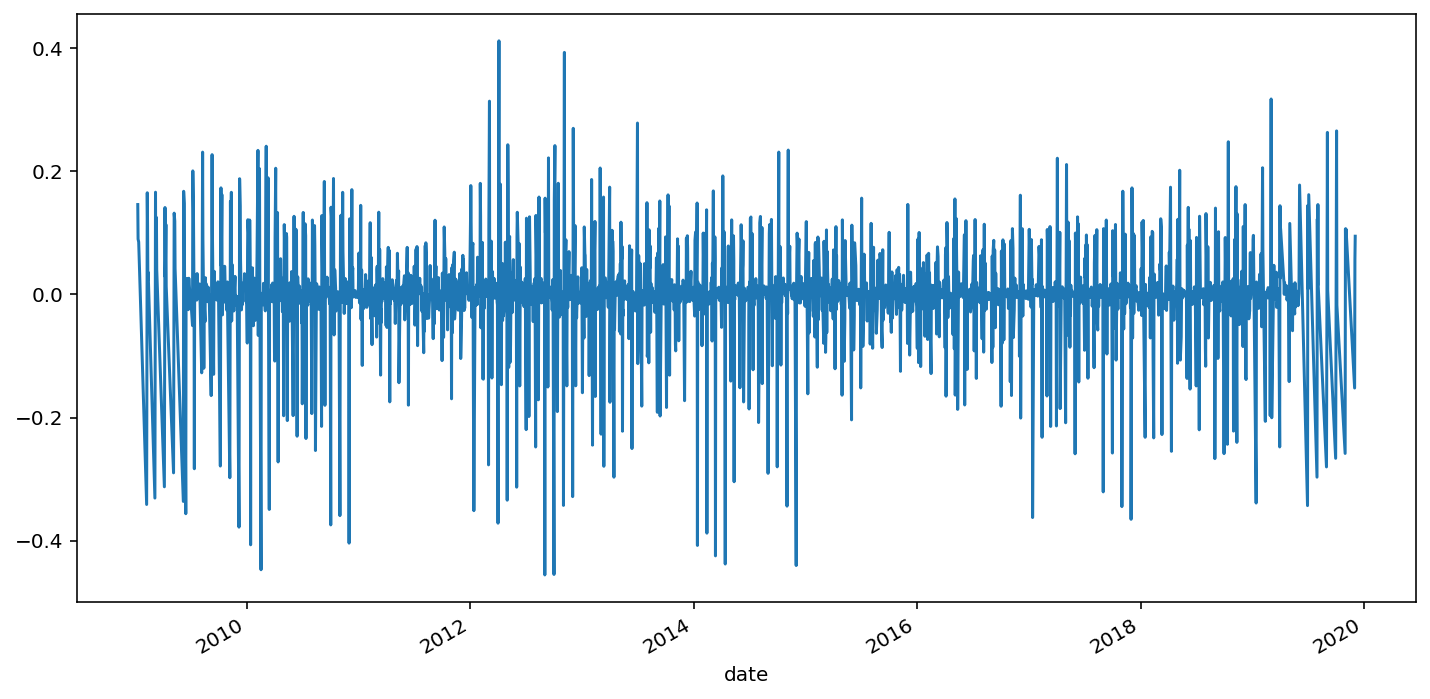

In [23]:
df_week.weekly_ret.plot(kind='line', figsize=(12, 6));

In [24]:
udiff = df_week.drop(['close'], axis=1)
udiff.head()

,weekly_ret
date,
2009-01-09,0.146094
2009-01-10,0.089972
2009-01-12,0.085331
2009-02-07,-0.341265
2009-02-09,0.165247


In [25]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [26]:
rolmean = udiff.rolling(20).mean()
rolstd = udiff.rolling(20).std()

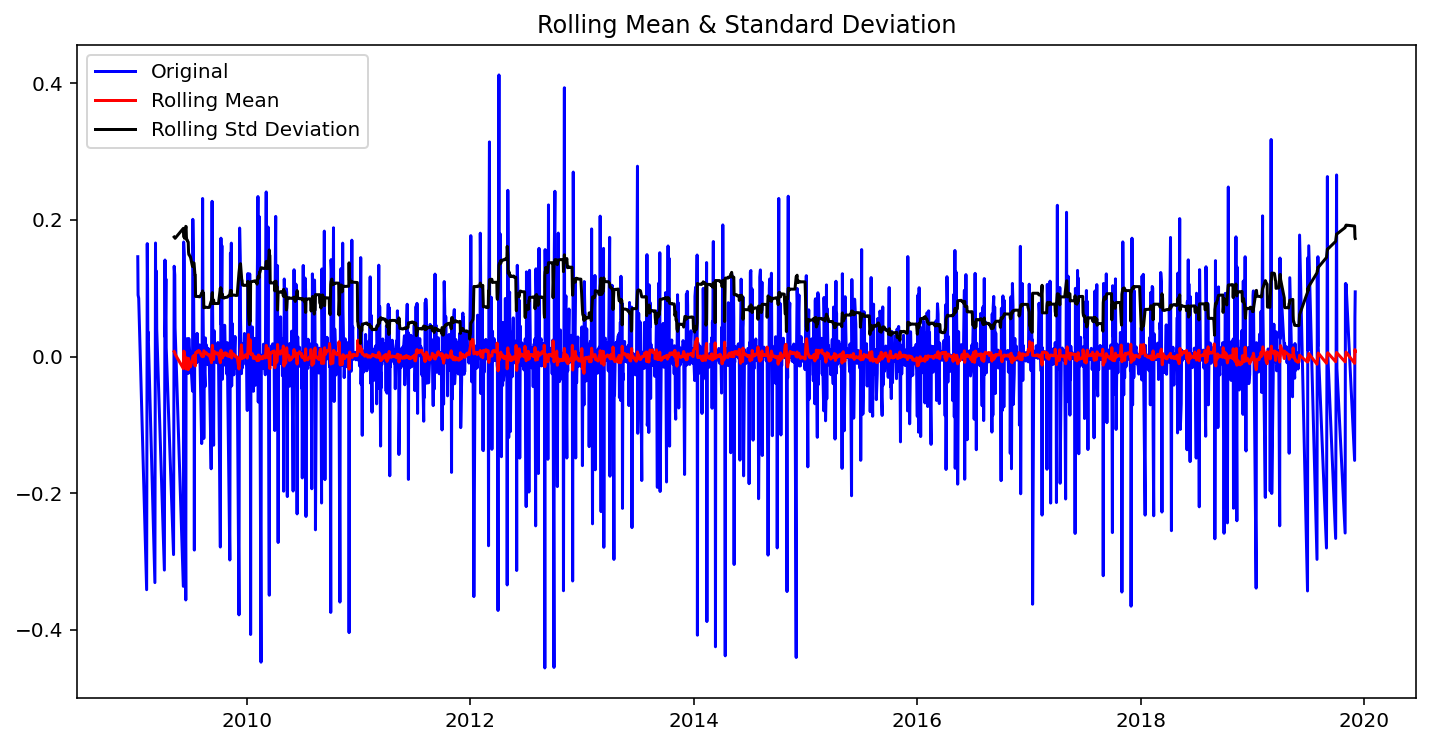

In [27]:
plt.figure(figsize=(12, 6))
orig = plt.plot(udiff, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

In [28]:
# Perform Dickey-Fuller test
dftest = sm.tsa.adfuller(udiff.weekly_ret, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value ({0})'.format(key)] = value
    
dfoutput

Test Statistic                -1.596740e+01
p-value                        7.066850e-29
#Lags Used                     2.200000e+01
Number of Observations Used    2.493000e+03
Critical Value (1%)           -3.432976e+00
Critical Value (5%)           -2.862700e+00
Critical Value (10%)          -2.567388e+00
dtype: float64

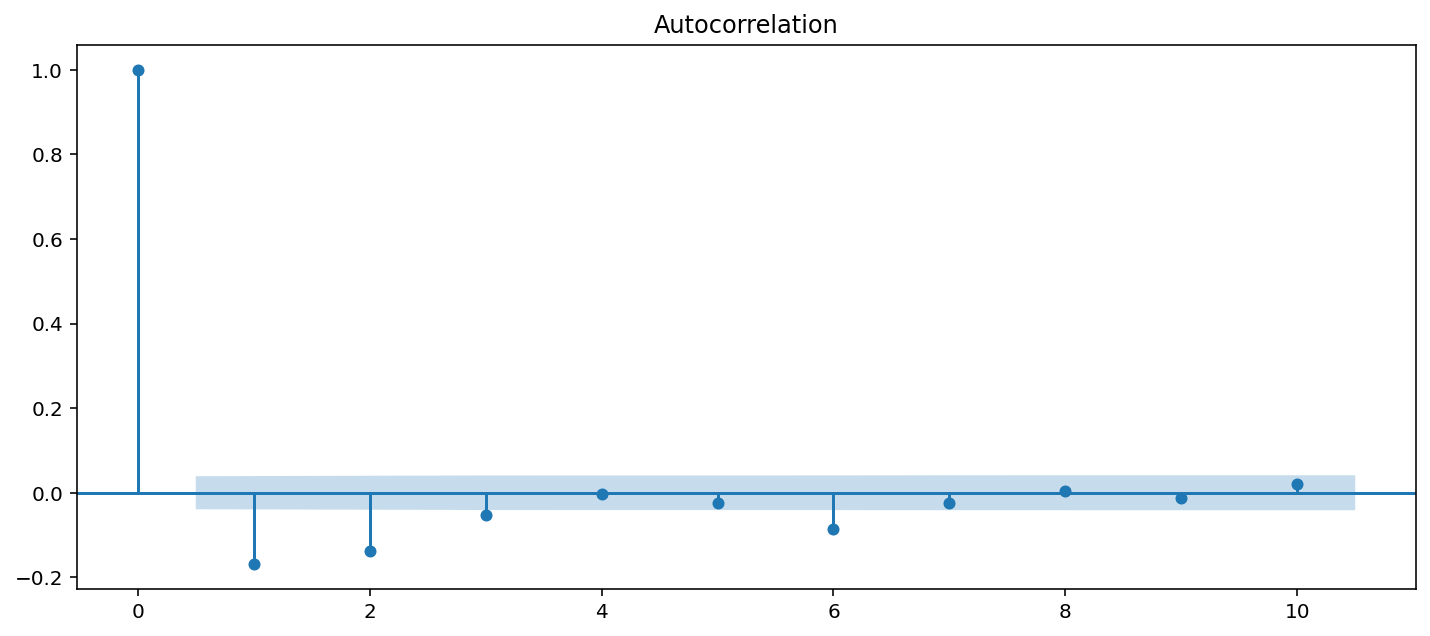

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

# the autocorrelation chart provides just the correlation at increasing lags
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(udiff.values, lags=10, ax=ax)
plt.show()

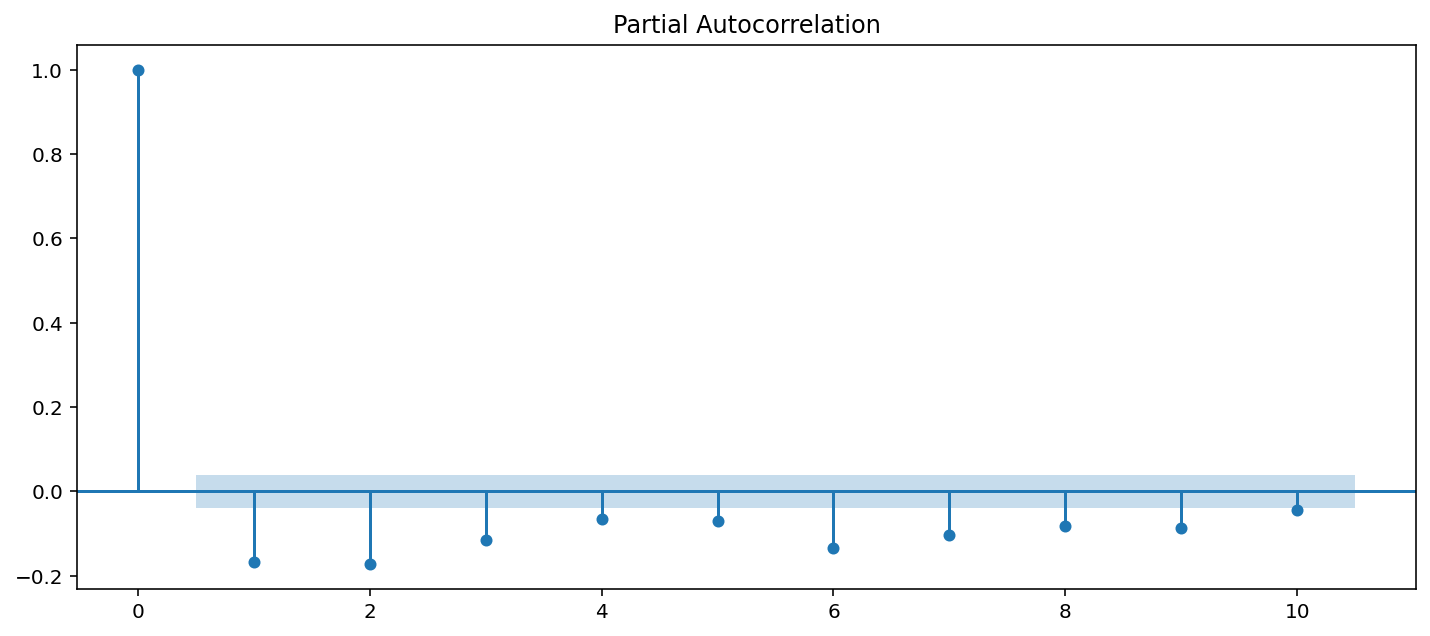

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(udiff.values, lags=10, ax=ax)
plt.show()